In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Reading the csv file containing the data

In [57]:
#reading the dataset
dataset = pd.read_csv('train.csv')

Some Basic info about the data

In [58]:
#checking the shape of the dataset
dataset.shape

(54808, 14)

In [59]:
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [60]:
dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Preprocessing of data

In [63]:
#checking for null values in the dataset
dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [64]:
#filling the null values
dataset['education'].fillna(dataset['education'].mode()[0], inplace = True)
dataset['previous_year_rating'].fillna(2, inplace = True)

#checking for null values again:
dataset.isnull().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [65]:
#removing unimportant variables: i.e. dropping the emp_id
dataset = dataset.drop(['employee_id'], axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Data Visualization

1- For each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A873246880>,
      dtype=object)

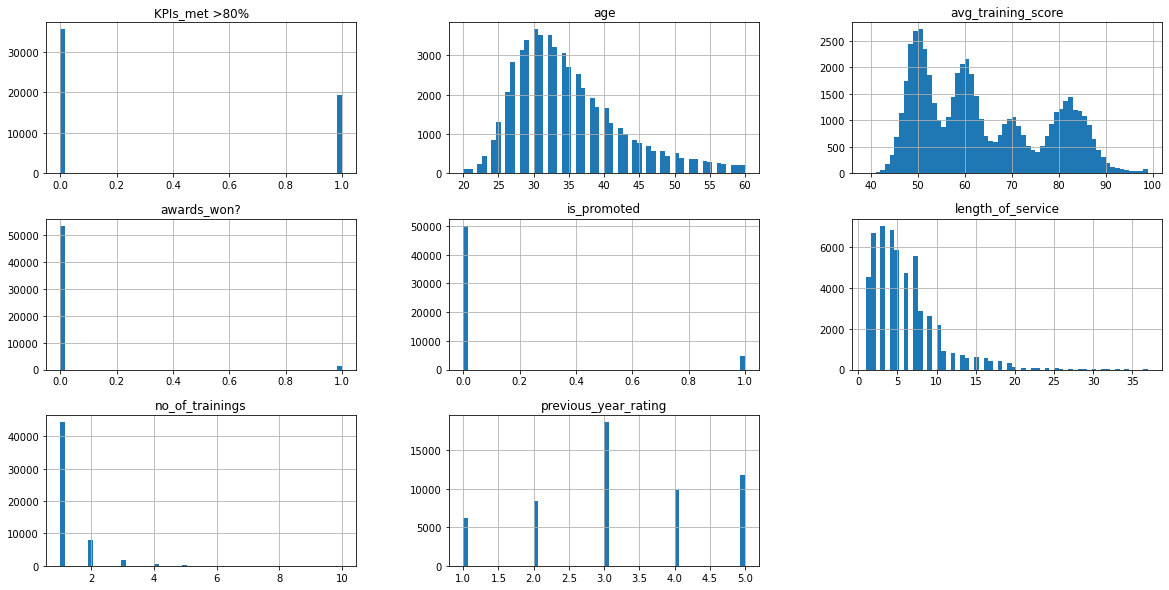

In [66]:
#plotting the histogram distribution of each numerical feature
dataset.hist(bins=60,figsize=(20,10))

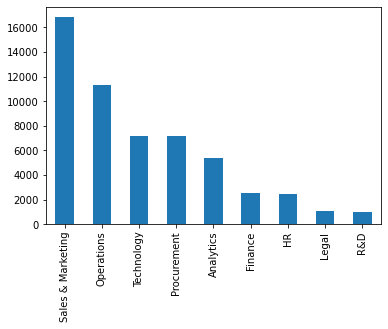

In [67]:
#plotting a bar plot for the categorical variable department
dataset['department'].value_counts().plot(kind='bar')

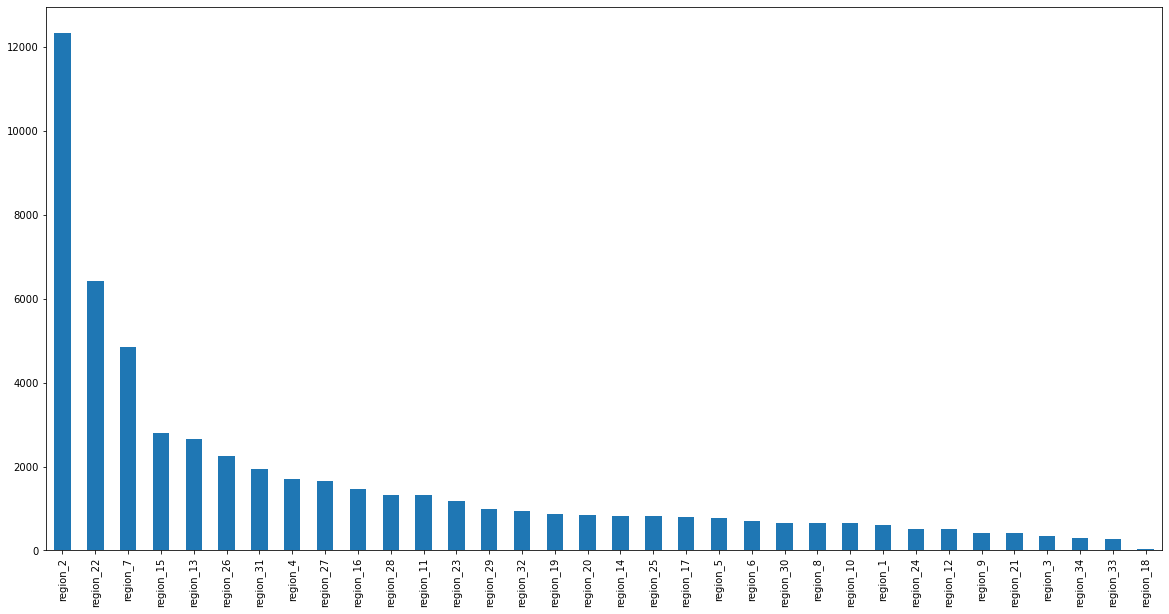

In [69]:
#plotting a bar plot for the categorical variable region
dataset['region'].value_counts().plot(kind='bar', figsize=(20,10))

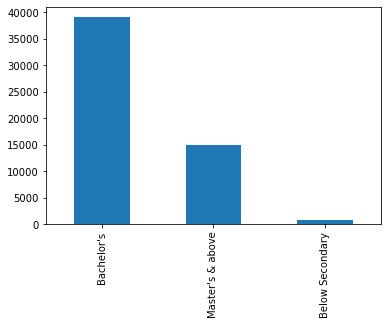

In [70]:
#plotting a bar plot for the categorical variable education
dataset['education'].value_counts().plot(kind='bar')

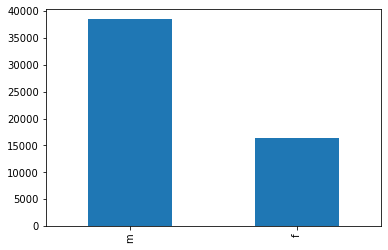

In [71]:
#plotting a bar plot for the categorical variable gender
dataset['gender'].value_counts().plot(kind='bar')

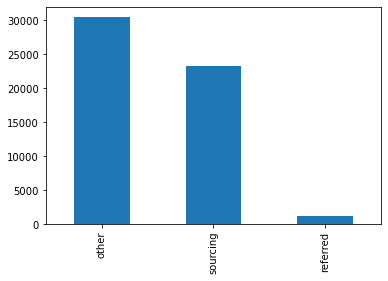

In [72]:
#plotting a bar plot for the categorical variable recruitment_channel
dataset['recruitment_channel'].value_counts().plot(kind='bar')

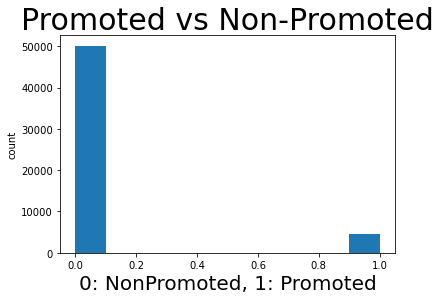

In [14]:
#plotting a scatter plot to check for imbalancing classes
plt.hist(dataset['is_promoted'])
plt.title('Promoted vs Non-Promoted', fontsize = 30)
plt.xlabel('0: NonPromoted, 1: Promoted', fontsize = 20)
plt.ylabel('count')
plt.show()
#Problem of imbalanced class, need to be solved.

In [ ]:
#Some deductions from the previous univariate plots:
#1. The distribution of the is_promoted (target) variable is imbalanced. we need to find a solution for that
#2.  We will use SMOTE as another preprocessing step to balance the classes

2- Relations between variables

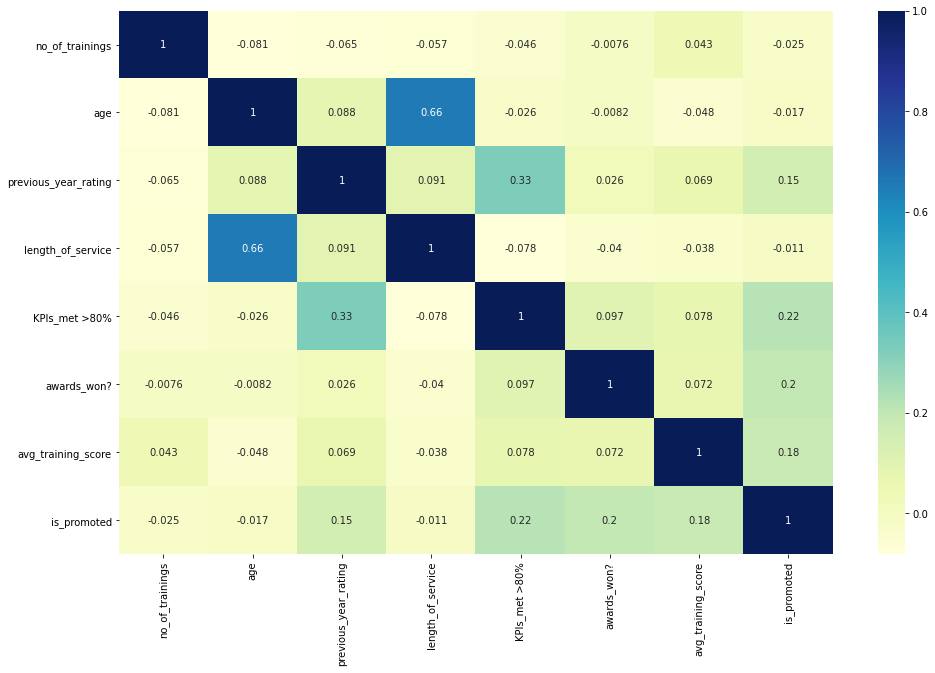

In [73]:
#draw the heat map to check for correlation values
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()
#No variables to be removed from the dataset (no high correlation between any two variables)

Applying association rule

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [32]:
rows, cols = dataset.shape

records = []
for i in range(0, rows):
    print(i)
    records.append([str(dataset.values[i,j]) for j in range(0, cols)])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [42]:
association_rules = apriori(records, min_support=0.002, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
association_results = list(association_rules)

In [45]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 23 -> 2.0
Support: 0.00457962341264049
Confidence: 0.5091277890466531
Lift: 3.3422297115904853
Rule: 24 -> 2.0
Support: 0.007699605896949351
Confidence: 0.46120218579234973
Lift: 3.027616409019895
Rule: Below Secondary -> 23
Support: 0.002627353670996935
Confidence: 0.2920892494929006
Lift: 19.886742343114157
Rule: Below Secondary -> 24
Support: 0.0037220843672456576
Confidence: 0.22295081967213112
Lift: 15.179488850422562
Rule: 57 -> Operations
Support: 0.019869362136914318
Confidence: 0.652486518873577
Lift: 3.1513465920358663
Rule: 58 -> Operations
Support: 0.02610932710553204
Confidence: 0.6794871794871795
Lift: 3.2817530254964167
Rule: 59 -> Operations
Support: 0.02859071668369581
Confidence: 0.6924436588599204
Lift: 3.3443295783216884
Rule: Operations -> 60
Support: 0.029849656984381842
Confidence: 0.690295358649789
Lift: 3.3339538259497385
Rule: 61 -> Operations
Support: 0.025397752152970368
Confidence: 0.7408195848855774
Lift: 3.5779731942552635
Rule: 62 -> Operations
Sup

Clustering

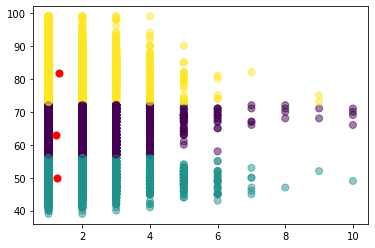

In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(dataset[['no_of_trainings','avg_training_score']])
centroids = kmeans.cluster_centers_
plt.scatter(dataset['no_of_trainings'], dataset['avg_training_score'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


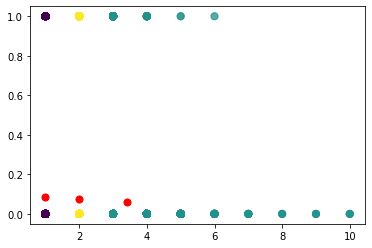

In [76]:
#clustering between is_promoted and age
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(dataset[['no_of_trainings','is_promoted']])
centroids = kmeans.cluster_centers_
plt.scatter(dataset['no_of_trainings'], dataset['is_promoted'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Handling Categorical data

In [16]:
#split data into features and target
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(X.shape)
print(y.shape)

(54808, 12)
(54808,)


In [17]:
#performing one hot encoding on the categorical variables
X = pd.get_dummies(X)
X.columns


Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

Handling Imbalanced class

In [48]:
from imblearn.over_sampling import SMOTE


X, y = SMOTE().fit_resample(X, y.values.ravel())

X = pd.DataFrame(X)
y = pd.DataFrame(y)

to_be_exported = pd.concat([X, y], axis=1)
to_be_exported.to_csv('train_smote.csv', index=False)


print( X.shape)
print( y.shape)

(100280, 58)
(100280, 1)


In [19]:
y[0].value_counts()

1    50140
0    50140
Name: 0, dtype: int64

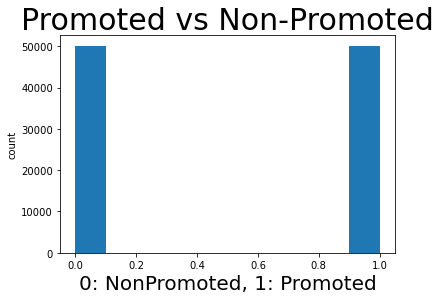

In [20]:
#plotting a scatter plot to check for imbalancing classes
plt.hist(y[0])
plt.title('Promoted vs Non-Promoted', fontsize = 30)
plt.xlabel('0: NonPromoted, 1: Promoted', fontsize = 20)
plt.ylabel('count')
plt.show()
#Problem of imbalanced class, need to be solved.

splitting the data set into train and test

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [60]:
#trying out svm model
from sklearn.svm import SVC
SVM = SVC(kernel='rbf', degree=3, C=5, probability=True).fit(x_train, y_train)
y_pred = SVM.predict(x_test)

#evaluating 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))




E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[11869   588]
 [ 1785 10828]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12457
           1       0.95      0.86      0.90     12613

    accuracy                           0.91     25070
   macro avg       0.91      0.91      0.91     25070
weighted avg       0.91      0.91      0.91     25070

0.9053450339050658


In [26]:
#trying KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
y_pred_knn = KNN.predict(x_test)

#evaluating 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[ 8964  3493]
 [   53 12560]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     12457
           1       0.78      1.00      0.88     12613

    accuracy                           0.86     25070
   macro avg       0.89      0.86      0.86     25070
weighted avg       0.89      0.86      0.86     25070

0.8585560430793777


In [24]:
#trying decision tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))


[[11563   894]
 [  585 12028]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12457
           1       0.93      0.95      0.94     12613

    accuracy                           0.94     25070
   macro avg       0.94      0.94      0.94     25070
weighted avg       0.94      0.94      0.94     25070

0.9410051854806541


In [27]:
#trying naive bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(x_train, y_train)
y_pred_nb = NB.predict(x_test)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))

[[ 7090  5367]
 [ 1004 11609]]
              precision    recall  f1-score   support

           0       0.88      0.57      0.69     12457
           1       0.68      0.92      0.78     12613

    accuracy                           0.75     25070
   macro avg       0.78      0.74      0.74     25070
weighted avg       0.78      0.75      0.74     25070

0.7458715596330275


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#trygin random forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

<ipython-input-28-c5c43338e127>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)


[[12181   276]
 [  656 11957]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12457
           1       0.98      0.95      0.96     12613

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070

0.9628240925408855


In [29]:
#trying logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x_train, y_train)
y_pred_lr = LR.predict(x_test)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[11257  1200]
 [ 1989 10624]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     12457
           1       0.90      0.84      0.87     12613

    accuracy                           0.87     25070
   macro avg       0.87      0.87      0.87     25070
weighted avg       0.87      0.87      0.87     25070

0.8727961707219785


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#TODO:
#1- Association rules/ clustering
#2- Why decision trees and random forests are better than other models?
#IMPORTNANT#3- modify the logic of the reducer 
#IMPORTNANT#4- run parallel mappers